# Интеллектуальный анализ данных – весна 2024
# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов.

Будем предсказывать эмоциональную окраску твиттов о коронавирусе.



In [21]:
import numpy as np
import pandas as pd
from typing import  List
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation

In [7]:
!wget https://github.com/hse-ds/iad-intro-ds/blob/master/2024/homeworks/hw06_texts/tweets_coronavirus.csv

--2024-05-13 17:07:54--  https://github.com/hse-ds/iad-intro-ds/blob/master/2024/homeworks/hw06_texts/tweets_coronavirus.csv
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘tweets_coronavirus.csv’

tweets_coronavirus.     [ <=>                ] 261.76K  --.-KB/s    in 0.05s   

2024-05-13 17:07:54 (4.70 MB/s) - ‘tweets_coronavirus.csv’ saved [268044]



In [22]:
df = pd.read_csv('/content/tweets_coronavirus.csv', encoding='latin-1')
df.sample(4)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
32299,43535,88487,"New York, NY",13-04-2020,Bank of America doesnÃÂt expect the outlook ...,Positive
8647,14305,59257,"toronto, montreal",20-03-2020,I spoke with Strategy about the potential long...,Negative
16714,24151,69103,NaN,25-03-2020,1 For millions the most convenient place to ge...,Extremely Negative
7558,12973,57925,"East, England",20-03-2020,I m a big builder chap who worries about nothi...,Extremely Negative


Для каждого твитта указано:


*   UserName - имя пользователя, заменено на целое число для анонимности
*   ScreenName - отображающееся имя пользователя, заменено на целое число для анонимности
*   Location - местоположение
*   TweetAt - дата создания твитта
*   OriginalTweet - текст твитта
*   Sentiment - эмоциональная окраска твитта (целевая переменная)



## Задание 1 Подготовка (0.5 балла)

Целевая переменная находится в колонке `Sentiment`.  Преобразуйте ее таким образом, чтобы она стала бинарной: 1 - если у твитта положительная эмоциональная окраска и 0 - если отрицательная.

In [23]:
df['Sentiment'].unique()

array(['Positive', 'Extremely Negative', 'Negative', 'Extremely Positive'],
      dtype=object)

In [24]:
df['Sentiment'] = df['Sentiment'].replace(to_replace = ['Negative', 'Extremely Negative'], value = 0)
df['Sentiment'] = df['Sentiment'].replace(to_replace = ['Positive', 'Extremely Positive'], value = 1)

In [25]:
df['Sentiment'].unique()

array([1, 0])

Сбалансированы ли классы?

In [26]:
balance_sentiment = int(100 - (100 * min(df['Sentiment'].value_counts())) / max(df['Sentiment'].value_counts()))
print(f'Разница классов в столбце окраса твита составляет: {balance_sentiment} %')

Разница классов в столбце окраса твита составляет: 14 %


**Ответ:** Да, классы положительных/отрицательных твитов достаточно хорошо сбалансированны, в качестве наглядного примера приведу визуализацию количества положительных/отрицательных упоминаний

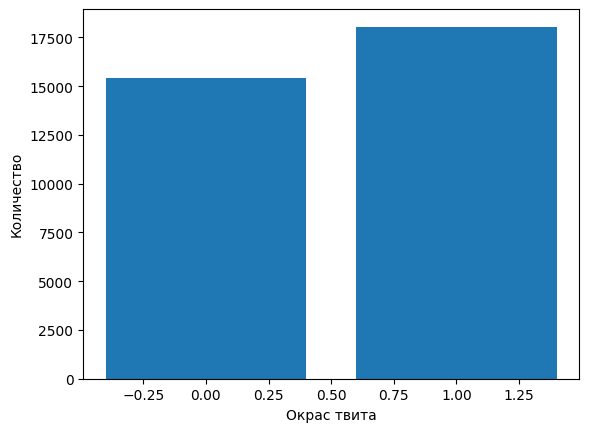

In [14]:
values_sentiment = df['Sentiment'].value_counts().sort_index()

plt.bar(values_sentiment.index, values_sentiment.values)

plt.xlabel('Окрас твита')
plt.ylabel('Количество')
plt.show()

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их строкой 'Unknown'.

In [15]:
print(df.isna().mean())
print(df.isna().sum().sum())

UserName         0.00000
ScreenName       0.00000
Location         0.21077
TweetAt          0.00000
OriginalTweet    0.00000
Sentiment        0.00000
dtype: float64
7049


В данных есть пропуски, конкретно в столбце "Location", где находятся данные о местоположении пользователя, заполним их строкой "Unknown"

In [27]:
df = df.fillna("Unknown")

In [28]:
df.isna().mean()

UserName         0.0
ScreenName       0.0
Location         0.0
TweetAt          0.0
OriginalTweet    0.0
Sentiment        0.0
dtype: float64

Разделите данные на обучающие и тестовые в соотношении 7 : 3 и `random_state=0`

In [29]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.3, random_state = 0)

## Задание 2 Токенизация (3 балла)

Постройте словарь на основе обучающей выборки и посчитайте количество встреч каждого токена с использованием самой простой токенизации - деления текстов по пробельным символам и приведение токенов в нижний регистр

In [36]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
string = ' '.join(train['OriginalTweet'])

In [38]:
string = string.lower()

In [39]:
dictionary = string.lower()

In [40]:
dictionary = dictionary.split()

In [41]:
dictionary

['why',
 'we',
 'still',
 'want',
 'to',
 'buy',
 'so',
 'much',
 'stuff',
 'during',
 'quarantine',
 'https://t.co/1m881cwfuv',
 '#shopping',
 '#covid_19',
 '#online',
 'with',
 'driving',
 'even',
 'more',
 'usage',
 'a',
 'strong',
 'strategy',
 'is',
 'critical',
 'now',
 'more',
 'then',
 'ever',
 'luckily',
 'and',
 'april',
 '16',
 'webinar',
 'will',
 'dive',
 'into',
 'growing',
 'app',
 'awareness',
 'and',
 'targeting',
 'high',
 'lifetime',
 'value',
 'users',
 '@canon_india',
 'i',
 'am',
 'very',
 'happy..',
 'great',
 'job',
 'by',
 '@canon_india',
 '#canonforcommunity',
 'https://t.co/z0intks34x',
 'the',
 'u.s',
 'national',
 'debt',
 'will',
 'likely',
 'exceed',
 '$30',
 'trillion',
 'after',
 'the',
 'unprecedented',
 'borrowing',
 'by',
 'the',
 'trump',
 'administration',
 'and',
 'mnuchinã\x82â\x92s',
 'treasury',
 'during',
 'the',
 '#coronavirus',
 'crisis.',
 'the',
 'federal',
 'reserve',
 'could',
 'be',
 'doing',
 'much',
 'more',
 'to',
 'cushion',
 'the',

Какой размер словаря получился?

In [42]:
len(dictionary)

754630

Выведите 10 самых популярных токенов с количеством встреч каждого из них. Объясните, почему именно эти токены в топе

In [43]:
from collections import Counter

In [44]:
dictionary_frequency = Counter(dictionary)

print("Самые популярные токены:")
for token, frequency in dictionary_frequency.most_common(10):
    print(token, ":", frequency)

Самые популярные токены:
the : 26815
to : 23373
and : 14684
of : 13012
a : 11737
in : 11198
for : 8566
#coronavirus : 8223
is : 7383
are : 7050


**Ответ:** Как мы видим, 9 токенов - это предлоги, они всегда самые распространнёные, потому что на них строятся предложения, далее необходимо удалить их чтобы они не мешали анализу (либо же сделать их вес самым минимальным). Также, на 10-ом месте по популярности стоит хэштэг о короновирусе, ведь все твиты посвещены именно ему



Удалите стоп-слова из словаря и выведите новый топ-10 токенов (и количество встреч) по популярности.  Что можно сказать  о нем?

In [45]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [46]:
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in dictionary if word not in stop_words]
filtered_text = ' '.join(filtered_words)

In [47]:
dictionary_wo_stops = filtered_text.split()

dictionary_wo_stops_frequency = Counter(dictionary_wo_stops)

print("Самые популярные токены:")
for token, frequency in dictionary_wo_stops_frequency.most_common(10):
    print(token, ":", frequency)

Самые популярные токены:
#coronavirus : 8223
prices : 3891
food : 3820
grocery : 3469
supermarket : 3288
people : 3175
covid-19 : 3173
store : 3155
#covid19 : 2471
&amp; : 2314


**Ответ:**  Теперь, самый популярный токен - это хэштэг о короновирусе, что логично, ведь он входил в прошлый топ-10. Все остальные, просто популярные слова

Также выведите 20 самых непопулярных слов (если самых непопулярных слов больше выведите любые 20 из них) Почему эти токены непопулярны, требуется ли как-то дополнительно работать с ними?

In [ ]:
print("Самые непопулярные токены:")
for token, frequency in dictionary_wo_stops_frequency.most_common()[:-21:-1]:
    print(token, ":", frequency)

Самые непопулярные токены:
https://t.co/7j2y3rsld9 : 1
@680news : 1
@torontopearson : 1
nothing... : 1
flew : 1
wage! : 1
renewing : 1
playersãâ : 1
subsidise : 1
non-playing : 1
premiership : 1
https://t.co/iaek4fwsgz : 1
@srinivasiyc : 1
https://t.co/zjcl195vqs : 1
#southkerry : 1
#skelligcoast2kms : 1
@skelligsix18 : 1
closer!) : 1
coast! : 1
skellig : 1


**Ответ:** Тут мы видим тэги пользователей, ссылки и слова со знаками препинания, с первыми двумя не уверен, что можно полноценно работать, а с третьим - думаю, можно попытаться использовать токенайзер лучше, чтобы отделить их и посмотреть результат



Теперь воспользуемся токенайзером получше - TweetTokenizer из библиотеки nltk. Примените его и посмотрите на топ-10 популярных слов. Чем он отличается от топа, который получался раньше? Почему?

In [48]:
from nltk.tokenize import TweetTokenizer

tokinizer = TweetTokenizer()

tweet_dictionary = tokinizer.tokenize(string)

In [49]:
tweet_dictionary_frequency = Counter(tweet_dictionary)

print("Самые популярные токены:")
for token, frequency in tweet_dictionary_frequency.most_common(10):
    print(token, ":", frequency)

Самые популярные токены:
the : 26993
. : 24108
to : 23478
, : 17571
and : 14825
of : 13044
a : 11891
in : 11348
? : 9524
#coronavirus : 8808


**Ответ:** В этом топе также присутствуют разделённые знаки препинания, они встречаются очень часто, но в прошлом топе они отсутствовали, т.к. предыдущий токенайзер не мог разделять их

Удалите из словаря стоп-слова и пунктуацию, посмотрите на новый топ-10 слов с количеством встреч, есть ли теперь в нем что-то не похожее на слова?

In [50]:
from string import punctuation

noise = stopwords.words('english') + list(punctuation)

filtered_words = [word for word in dictionary if word not in noise]
filtered_tweets = ' '.join(filtered_words)

In [ ]:
tweets_wo_stops = filtered_tweets.split()

tweets_wo_stops_frequency = Counter(tweets_wo_stops)

print("Самые популярные токены:")
for token, frequency in tweets_wo_stops_frequency.most_common(10):
    print(token, ":", frequency)

Самые популярные токены:
#coronavirus : 8223
prices : 3891
food : 3820
grocery : 3469
supermarket : 3288
people : 3175
covid-19 : 3173
store : 3155
#covid19 : 2471
&amp; : 2314


**Ответ:** Да, хоть и 9 из 10 - это слова или хэштеги, у нас затесалась кодировка знака "амперсанд"

Удалите из словаря токены из одного символа, с позицией в таблице Unicode 128 и более (`ord(x) >= 128`)

Выведите топ-10 самых популярных и топ-20 непопулярных слов. Чем полученные топы отличаются от итоговых топов, полученных при использовании токенизации по пробелам? Что теперь лучше, а что хуже?

In [ ]:
filtered_tweets_wo_stops = {token: count for token, count in tweets_wo_stops_frequency.items() if len(token) > 1 or ord(token) < 128}

In [ ]:
filtered_tweets_wo_stops_frequency = Counter(filtered_tweets_wo_stops)

print("Самые популярные токены:")
for token, frequency in filtered_tweets_wo_stops_frequency.most_common(10):
    print(token, ":", frequency)

print("\nСамые непопулярные токены:")
for token, frequency in filtered_tweets_wo_stops_frequency.most_common()[:-21:-1]:
    print(token, ":", frequency)

Самые популярные токены:
#coronavirus : 8223
prices : 3891
food : 3820
grocery : 3469
supermarket : 3288
people : 3175
covid-19 : 3173
store : 3155
#covid19 : 2471
&amp; : 2314

Самые непопулярные токены:
https://t.co/7j2y3rsld9 : 1
@680news : 1
@torontopearson : 1
nothing... : 1
flew : 1
wage! : 1
renewing : 1
playersãâ : 1
subsidise : 1
non-playing : 1
premiership : 1
https://t.co/iaek4fwsgz : 1
@srinivasiyc : 1
https://t.co/zjcl195vqs : 1
#southkerry : 1
#skelligcoast2kms : 1
@skelligsix18 : 1
closer!) : 1
coast! : 1
skellig : 1


**Ответ:** Я не вижу различий

Выведите топ-10 популярных хештегов с количеством встреч. Что можно сказать о них?

In [51]:
import re
hashtags = re.findall(r'#\w+', string)

hashtag_frequency = Counter(hashtags)

print("Самые популярные хэштеги:")
for hashtag, frequency in hashtag_frequency.most_common(10):
    print(hashtag, ":", frequency)

Самые популярные хэштеги:
#coronavirus : 8835
#covid19 : 2593
#covid_19 : 1735
#covid2019 : 946
#covid : 863
#toiletpaper : 744
#socialdistancing : 465
#coronacrisis : 448
#pandemic : 257
#coronaviruspandemic : 249


**Ответ:** 9 из 10 посвящены напрямую коронавирусу

То же самое проделайте для ссылок на сайт https://t.co Сравнима ли популярность ссылок с популярностью хештегов? Будет ли информация о ссылке на конкретную страницу полезна?

In [ ]:
t_links = re.findall(r' https://t.co/\w+', string)

t_links_frequency = Counter(t_links)

print("Самые популярные ссылки на сайт https://t.co:")
for t_link, frequency in t_links_frequency.most_common(10):
    print(t_link, ":", frequency)

Самые популярные ссылки на сайт https://t.co:
 https://t.co/oxa7swtond : 5
 https://t.co/gp3eusapl8 : 4
 https://t.co/deftrui1pfã : 3
 https://t.co/zjnrx6dkkn : 3
 https://t.co/3gbbdpdjat : 3
 https://t.co/e2znxajpre : 3
 https://t.co/g63rp042ho : 3
 https://t.co/aziqcdgrnn : 3
 https://t.co/bylqxrjmnt : 3
 https://t.co/wuieefsnoj : 3


**Ответ:** Нет, популярность самого высокого, меньше более, чем в 1000 раз! Так что, не сравнима. Думаю, что информация о ссылке на конкретную страницу не так полезна, когда мы будем смотреть новые данные

Используем опыт предыдущих экспериментов и напишем собственный токенайзер, улучшив TweetTokenizer. Функция tokenize должна:



*   Привести текст в нижний регистр
*   Применить TweetTokenizer для изначального выделения токенов
*   Удалить стоп-слова, пунктуацию, токены из одного символа, с позицией в таблице Unicode 128 и более и ссылки на t.co



In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
def custom_tokenizer(text):
    text = text.lower()
    tokenizer = TweetTokenizer()
    initial_tokens = tokenizer.tokenize(text)

    tokens = [
        token for token in initial_tokens
        if token not in stop_words
        and token not in punctuation
        and (len(token) == 1 and ord(token) < 128 or (len(token) > 1))
        and not token.startswith('https://t.co')
    ]

    return tokens

In [53]:
custom_tokenizer('This is sample text!!!! @Sample_text I, \x92\x92 https://t.co/sample  #sampletext')

['sample', 'text', '#sampletext']

## Задание 3 Векторизация текстов (2 балла)

Обучите CountVectorizer с использованием custom_tokenizer в качестве токенайзера. Как размер полученного словаря соотносится с размером изначального словаря из начала задания 2?

In [54]:
string = ' '.join(train['OriginalTweet'])

In [55]:
dictionary = custom_tokenizer(string)

In [56]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X = cv.fit_transform(dictionary)


print(len(cv.vocabulary_))

34125


**Ответ:** Размер уменьшился




Посмотрим на какой-нибудь конкретный твитт:

In [ ]:
ind = 9023
train.iloc[ind]['OriginalTweet'], train.iloc[ind]['Sentiment']

('Nice one @SkyNews lets not panic but show ppl in france queueing for food!!! #CoronavirusOutbreak #COVID2019 brainless!! Ffs',
 0)

Автор твитта не доволен ситуацией с едой во Франции и текст имеет резко негативную окраску.

Примените обученный CountVectorizer для векторизации данного текста, и попытайтесь определить самый важный токен и самый неважный токен (токен, компонента которого в векторе максимальна/минимальна, без учета 0). Хорошо ли они определились, почему?

In [ ]:
tweet = train.iloc[9023]['OriginalTweet']
tweet_vector = cv.transform([tweet])
tweet_vector = tweet_vector.toarray()[0]

most_important_token = list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(tweet_vector.argmax())]
least_important_token = list(cv.vocabulary_.keys())[list(tweet_vector).index(tweet_vector.min())]
print("Самый важный токен:", most_important_token)
print("Самый неважный токен:", least_important_token)

Самый важный токен: brainless
Самый неважный токен: still


**Ответ:** В целом, хорошо. Ведь по слову brainless можно понять окраску твита

Теперь примените TfidfVectorizer и  определите самый важный/неважный токены. Хорошо ли определились, почему?

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train['OriginalTweet'])

feature_names = vectorizer.get_feature_names_out()

first_document_vector = X[9023]

df_show = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])

print(df_show.sort_values(by=["tfidf"],ascending=False))

               tfidf
brainless   0.379803
queueing    0.347968
ffs         0.316620
france      0.303411
skynews     0.302034
...              ...
f6d39ce9eb  0.000000
f6h8ukprjo  0.000000
f6k5c2s3be  0.000000
f6llyrhko2  0.000000
â½          0.000000

[52798 rows x 1 columns]


**Ответ:** В целом, хорошо. Ведь по слову brainless можно понять окраску твита

Найдите какой-нибудь положительно окрашенный твитт, где TfidfVectorizer хорошо (полезно для определения окраски) выделяет важный токен, поясните пример.

*Подсказка:* явно положительные твитты можно искать при помощи положительных слов (good, great, amazing и т. д.)

In [ ]:
train[train['OriginalTweet'].apply(lambda x: 'amazing' in x) & (train['Sentiment'] == 1)].sample(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
21882,30510,75462,Unknown,02-04-2020,Standing in a 40 minute queue for the supermar...,1
16543,23943,68895,"Surat, Gujarat",24-03-2020,Day 3 of #quarantine and I'm playing amazon qu...,1
23318,32289,77241,"Dublin City, Ireland",04-04-2020,Healthcare workers are amazing during this #CO...,1
2734,7106,52058,UK,18-03-2020,"Crude Oil is now worth 2001 prices, $20 a barr...",1
19172,27135,72087,"Adelaide, Australia",26-03-2020,"@markbritnell Agreed, in a month itÃÂs amazi...",1


In [ ]:
good_tweet = train[train['UserName'] == 32289		]['OriginalTweet']
good_tweet
first_document_vector = X[train['UserName'] == 32289		]

df_show = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])

print(df_show.sort_values(by=["tfidf"],ascending=False))

               tfidf
amazing     0.349992
workers     0.317538
healthcare  0.298841
gettin      0.283598
binmen      0.264638
...              ...
f6ung4rwiq  0.000000
f6x607ne0h  0.000000
f79p5kkdmr  0.000000
f7sadm0lzw  0.000000
â½          0.000000

[52798 rows x 1 columns]


**Ответ:** В данном примере одни из самых важных токенов amazing и helthcare, с помощью которых можно хорошо определить окраску твита

## Задание 4 Обучение первых моделей (1 балл)

Примените оба векторайзера для получения матриц с признаками текстов.  Выделите целевую переменную.

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

cv = CountVectorizer(tokenizer=custom_tokenizer)
X_train_counts = cv.fit_transform(train['OriginalTweet'])
X_test_counts = cv.transform(test['OriginalTweet'])

tfidf = TfidfVectorizer(tokenizer=custom_tokenizer)
X_train_tfidf = tfidf.fit_transform(train['OriginalTweet'])
X_test_tfidf = tfidf.transform(test['OriginalTweet'])
y_train = train['Sentiment']
y_test = test['Sentiment']

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Обучите логистическую регрессию на векторах из обоих векторайзеров. Посчитайте долю правильных ответов на обучающих и тестовых данных. Какой векторайзер показал лучший результат? Что можно сказать о моделях?

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model_counts = LogisticRegression(max_iter=1000)
model_counts.fit(X_train_counts, y_train)
y_train_pred_counts = model_counts.predict(X_train_counts)
y_test_pred_counts = model_counts.predict(X_test_counts)
train_accuracy_counts = accuracy_score(y_train, y_train_pred_counts)
test_accuracy_counts = accuracy_score(y_test, y_test_pred_counts)

model_tfidf = LogisticRegression(max_iter=1000)
model_tfidf.fit(X_train_tfidf, y_train)
y_train_pred_tfidf = model_tfidf.predict(X_train_tfidf)
y_test_pred_tfidf = model_tfidf.predict(X_test_tfidf)
train_accuracy_tfidf = accuracy_score(y_train, y_train_pred_tfidf)
test_accuracy_tfidf = accuracy_score(y_test, y_test_pred_tfidf)

print(f'Count Vectorizer - Train Accuracy: {train_accuracy_counts}, Test Accuracy: {test_accuracy_counts}')
print(f'Tfidf Vectorizer - Train Accuracy: {train_accuracy_tfidf}, Test Accuracy: {test_accuracy_tfidf}')


Count Vectorizer - Train Accuracy: 0.9826569841947885, Test Accuracy: 0.8682479569463823
Tfidf Vectorizer - Train Accuracy: 0.923579666809056, Test Accuracy: 0.8535977675901933


**Ответ:** Count показал себя лучше и на обучающей,  и на тестовой выборке

## Задание 5 Стемминг (0.5 балла)

Для уменьшения словаря можно использовать стемминг.

Модифицируйте написанный токенайзер, добавив в него стемминг с использованием SnowballStemmer. Обучите Count- и Tfidf- векторайзеры. Как изменился размер словаря?

In [ ]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [ ]:
def custom_stem_tokenizer(text):
  text = text.lower()
  tokens = tokinizer.tokenize(text)

  tokens = [
        stemmer.stem(token) for token in tokens
        if token not in stop_words
        and token not in punctuation
        and (len(token) == 1 and ord(token) < 128 or (len(token) > 1))
        and not token.startswith('https://t.co')
    ]
  return tokens

In [ ]:
custom_stem_tokenizer('This is sample text!!!! @Sample_text I, \x92\x92 https://t.co/sample  #sampletext adding more words to check stemming')

['sampl', 'text', '@sample_text', '#sampletext', 'ad', 'word', 'check', 'stem']

In [ ]:
cv_stem = CountVectorizer(tokenizer=custom_stem_tokenizer)
X_train_cv_stem = cv_stem.fit_transform(train['OriginalTweet'])
print(f"Размер словаря используя CountVectorizer с стеммингом: {len(cv_stem.vocabulary_)}")

tfidf_stem = TfidfVectorizer(tokenizer=custom_stem_tokenizer)
X_train_tfidf_stem = tfidf_stem.fit_transform(train['OriginalTweet'])
print(f"Размер словаря используя TfidfVectorizer с стеммингом: {len(tfidf_stem.vocabulary_)}")

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Размер словаря используя CountVectorizer с стеммингом: 36652
Размер словаря используя TfidfVectorizer с стеммингом: 36652


**Ответ** Размер словаря увеличился на 2000 токенов

Обучите логистическую регрессию с использованием обоих векторайзеров. Изменилось ли качество? Есть ли смысл применять стемминг?

In [ ]:
X_test_cv_stem = cv_stem.transform(test['OriginalTweet'])
X_test_tfidf_stem = tfidf_stem.transform(test['OriginalTweet'])

model_cv_stem = LogisticRegression(max_iter=1000)
model_cv_stem.fit(X_train_cv_stem, y_train)
y_train_pred_cv_stem = model_cv_stem.predict(X_train_cv_stem)
y_test_pred_cv_stem = model_cv_stem.predict(X_test_cv_stem)

model_tfidf_stem = LogisticRegression(max_iter=1000)
model_tfidf_stem.fit(X_train_tfidf_stem, y_train)
y_train_pred_tfidf_stem = model_tfidf_stem.predict(X_train_tfidf_stem)
y_test_pred_tfidf_stem = model_tfidf_stem.predict(X_test_tfidf_stem)

train_accuracy_cv_stem = accuracy_score(y_train, y_train_pred_cv_stem)
test_accuracy_cv_stem = accuracy_score(y_test, y_test_pred_cv_stem)
train_accuracy_tfidf_stem = accuracy_score(y_train, y_train_pred_tfidf_stem)
test_accuracy_tfidf_stem = accuracy_score(y_test, y_test_pred_tfidf_stem)

print(f'Count Vectorizer with Stemming - Train Accuracy: {train_accuracy_cv_stem}, Test Accuracy: {test_accuracy_cv_stem}')
print(f'Tfidf Vectorizer with Stemming - Train Accuracy: {train_accuracy_tfidf_stem}, Test Accuracy: {test_accuracy_tfidf_stem}')

print(f'Count Vectorizer - Train Accuracy: {train_accuracy_counts}, Test Accuracy: {test_accuracy_counts}')
print(f'Tfidf Vectorizer - Train Accuracy: {train_accuracy_tfidf}, Test Accuracy: {test_accuracy_tfidf}')


Count Vectorizer with Stemming - Train Accuracy: 0.9718923536950022, Test Accuracy: 0.8672513454255532
Tfidf Vectorizer with Stemming - Train Accuracy: 0.9158906450234943, Test Accuracy: 0.8560892963922663
Count Vectorizer - Train Accuracy: 0.9826569841947885, Test Accuracy: 0.8682479569463823
Tfidf Vectorizer - Train Accuracy: 0.923579666809056, Test Accuracy: 0.8535977675901933


**Ответ:** Немного, но на тестовой выборке accuracy стал лучше, а значит применять стемминг имеет смысл, хотя, возможно, и избыточно для нашей ситуации

## Задание  6 Работа с частотами (1.5 балла)

Еще один способ уменьшить количество признаков - это использовать параметры min_df и max_df при построении векторайзера  эти параметры помогают ограничить требуемую частоту встречаемости токена в документах.

По умолчанию берутся все токены, которые встретились хотя бы один раз.



Подберите max_df такой, что размер словаря будет 36651 (на 1 меньше, чем было). Почему параметр получился такой большой/маленький?

In [59]:
texts = train['OriginalTweet']

for max_df in np.arange(1.0, 0.0, -0.1):
    cv_df = CountVectorizer(tokenizer=custom_stem_tokenizer, max_df=max_df).fit(texts)
    if len(cv_df.vocabulary_) <= 36651:
        print(f"The max_df value that results in a vocabulary size of 36651 is: {max_df}")
        print(f"Vocabulary size: {len(cv_df.vocabulary_)}")
        break

print(len(cv_df.vocabulary_))

NameError: name 'custom_stem_tokenizer' is not defined

**Ответ:** В словарь включаются довольно часто встречающиеся слова, но при этом достаточно способные отразить требуемые качества характера текста

Подберите min_df (используйте дефолтное значение max_df) в CountVectorizer таким образом, чтобы размер словаря был 3700 токенов (при использовании токенайзера со стеммингом), а качество осталось таким же, как и было. Что можно сказать о результатах?

In [ ]:
for min_df in np.arange(11, 15):
    cv_df = CountVectorizer(tokenizer=custom_stem_tokenizer, min_df=min_df).fit(texts)
    if len(cv_df.vocabulary_) <= 3700:
        print(f"The min_df value that results in a vocabulary size of {3700} is: {min_df}")
        print(f"Vocabulary size: {len(cv_df.vocabulary_)}")
        break

The min_df value that results in a vocabulary size of 3700 is: 11
Vocabulary size: 3700


**Ответ:** Теперь мы будем учитывать только те слова, которые встречаются не менее одиннадцати раз

В предыдущих заданиях признаки не скалировались. Отскалируйте данные (при словаре размера 3.7 тысяч, векторизованные CountVectorizer), обучите логистическую регрессию, посмотрите качество и выведите `berplot` содержащий по 10 токенов, с наибольшим по модулю положительными/отрицательными весами. Что можно сказать об этих токенах?

In [20]:
from sklearn.preprocessing import StandardScaler

cv = CountVectorizer(max_features=3700)
X_train = cv.fit_transform(train['OriginalTweet'])
X_test = cv.transform(test['OriginalTweet'])
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train = train['Sentiment']
y_test = test['Sentiment']

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')

feature_names = cv.get_feature_names_out()
coefficients = model.coef_.flatten()

top_positive_indices = np.argsort(coefficients)[-10:]
top_negative_indices = np.argsort(coefficients)[:10]

positive_tokens = feature_names[top_positive_indices]
negative_tokens = feature_names[top_negative_indices]
positive_values = coefficients[top_positive_indices]
negative_values = coefficients[top_negative_indices]

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=np.concatenate([positive_values, negative_values]),
            y=np.concatenate([positive_tokens, negative_tokens]), ax=ax)
ax.set_xlabel('Значения токенов')
plt.show()

print("Позитивные токены и их коэффициенты:")
for token, value in zip(positive_tokens, positive_values):
    print(f"{token}: {value:.4f}")

print("\nНегативные токены и их коэффициенты:")
for token, value in zip(negative_tokens, negative_values):
    print(f"{token}: {value:.4f}")

NameError: name 'CountVectorizer' is not defined

**Ответ:** Теперь токены отскалированы. Мы можем видеть, как топ самых популярных и непопулярных токенов имеют схожие коэффициенты. Они отражают суть твитов

## Задание 7 Другие признаки (1.5 балла)

Мы были сконцентрированы на работе с текстами твиттов и не использовали другие признаки - имена пользователя, дату и местоположение

Изучите признаки UserName и ScreenName. полезны ли они? Если полезны, то закодируйте их, добавьте к матрице с отскалированными признаками, обучите логистическую регрессию, замерьте качество.

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

stop_words = set(nltk.corpus.stopwords.words('english'))

tfidf_vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer)

categorical_encoder = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('text', tfidf_vectorizer, 'OriginalTweet'),
        ('cat', categorical_encoder, ['UserName', 'ScreenName'])
    ])

clf = Pipeline([
    ('prep', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

X_train = train[['OriginalTweet', 'UserName', 'ScreenName']]
X_test = test[['OriginalTweet', 'UserName', 'ScreenName']]
y_train = train['Sentiment']
y_test = test['Sentiment']

clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy: 0.844229619294399


**Ответ:** Доля верных ответов стала лучше на 0.5

Изучите признак TweetAt в обучающей выборке: преобразуйте его к типу datetime и нарисуйте его гистограмму с разделением по цвету на оспнове целевой переменной. Полезен ли он? Если полезен, то закодируйте его, добавьте к матрице с отскалированными признаками, обучите логистическую регрессию, замерьте качество.

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import scipy.sparse as sp

train['TweetAt'] = pd.to_datetime(train['TweetAt'], format='%d-%m-%Y')
base_date = pd.to_datetime('01-01-2020', format='%d-%m-%Y')
train['days_since_base'] = (train['TweetAt'] - base_date).dt.days
X_train = sp.hstack((X_train_tfidf, train['days_since_base'].values.reshape(-1, 1)))

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

test['TweetAt'] = pd.to_datetime(test['TweetAt'], format='%d-%m-%Y')
test['days_since_base'] = (test['TweetAt'] - base_date).dt.days
X_test = sp.hstack((X_test_tfidf, test['days_since_base'].values.reshape(-1, 1)))

y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.8531991229818616


**Ответ:** Доля верных ответов увеличилась ещё на 0.9


Поработайте с признаком Location в обучающей выборке. Сколько уникальных значений?

In [62]:
train['Location'].nunique()

7949

Постройте гистограмму топ-10 по популярности местоположений (исключая Unknown)

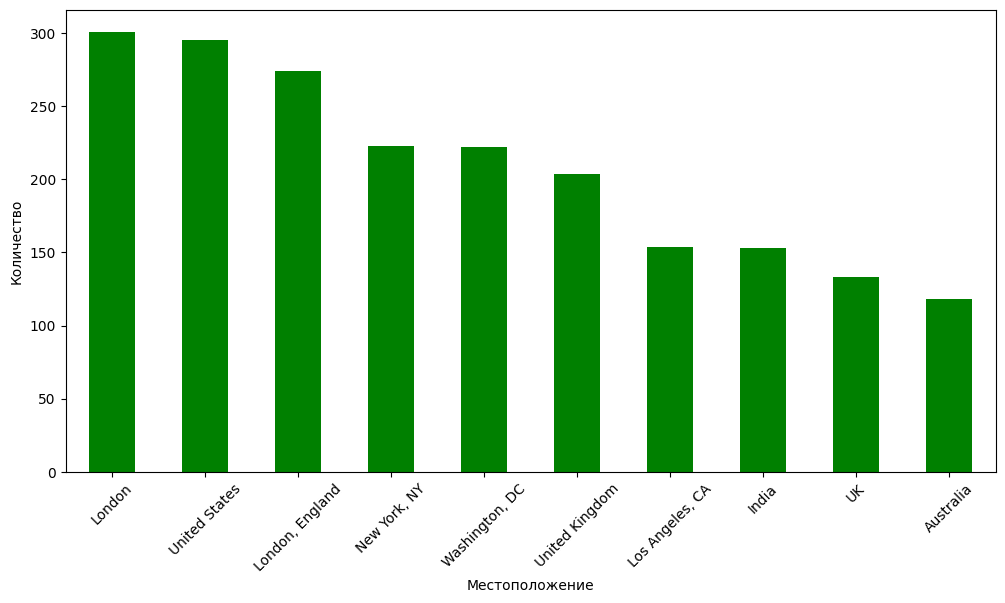

In [63]:
location_counts = train.loc[train['Location'] != 'Unknown', 'Location'].value_counts()

top_10_locations = location_counts.head(10)

plt.figure(figsize=(12, 6))
top_10_locations.plot(kind='bar', color = 'green')
plt.xlabel('Местоположение')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

Видно, что многие местоположения включают в себя более точное название места, чем другие (Например, у некоторых стоит London, UK; а у некоторых просто UK или United Kingdom).

Создайте новый признак WiderLocation, который содержит самое широкое местоположение (например, из London, UK должно получиться UK). Сколько уникальных категорий теперь? Постройте аналогичную гистограмму.

Количество уникальных категорий в новом признаке WiderLocation с объединением: 4628


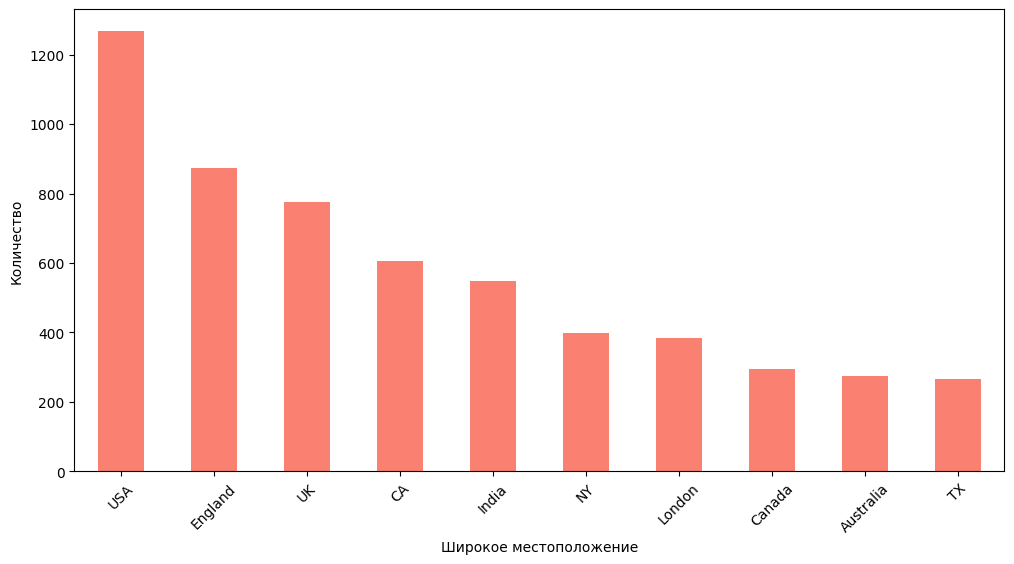

In [64]:
def combine_locations(location):
    if location in ['United Kingdom', 'UK']:
        return 'UK'
    elif location in ['United States']:
      return 'USA'
    else:
        return location

train['WiderLocation'] = train['Location'].str.split(',').apply(lambda x: x[-1].strip() if isinstance(x, list) else x)
train['WiderLocation'] = train['WiderLocation'].apply(combine_locations)

test['WiderLocation'] = test['Location'].str.split(',').apply(lambda x: x[-1].strip() if isinstance(x, list) else x)
test['WiderLocation'] = test['WiderLocation'].apply(combine_locations)

filtered_df = train[train['WiderLocation'] != 'Unknown']

num_unique_categories_combined = filtered_df['WiderLocation'].nunique()

print(f'Количество уникальных категорий в новом признаке WiderLocation с объединением: {num_unique_categories_combined}')

plt.figure(figsize=(12, 6))
filtered_df['WiderLocation'].value_counts().head(10).plot(kind='bar', color='salmon')
plt.xlabel('Широкое местоположение')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

Закодируйте признак WiderLocation с помощью OHE таким образом, чтобы создались только столбцы для местоположений, которые встречаются более одного раза. Сколько таких значений?


In [65]:
location_counts = train['WiderLocation'].value_counts()

locations_to_encode = location_counts[location_counts > 1].index

print("Количество значений, которые будут закодированы:", len(locations_to_encode))

Количество значений, которые будут закодированы: 986


Добавьте этот признак к матрице отскалированных текстовых признаков, обучите логистическую регрессию, замерьте качество. Как оно изменилось? Оказался ли признак полезным?


*Подсказка:* используйте параметр `categories` в энкодере.

In [66]:
encoder = OneHotEncoder(handle_unknown='ignore')
WiderLocation_encoded_train = encoder.fit_transform(train[['WiderLocation']])
WiderLocation_encoded_test = encoder.transform(test[['WiderLocation']])

X_train = sp.hstack((X_train_tfidf, WiderLocation_encoded_train))
X_test = sp.hstack((X_test_tfidf, WiderLocation_encoded_test))

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8445286027506478


**Ответ:** Доля верных ответов уменьшилась. В нашем случае признак не так полезен

## Задание 8 Хорошее качество (Бонус 1 балл)

Добейтесь accuracy=0.9 на тестовой выборке (можно сменить токенайзер, векторайзер, модель и т.д.)

In [68]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import MaxAbsScaler

In [100]:
x_train, x_test, y_train, y_test = train_test_split(df.OriginalTweet, df.Sentiment, test_size = 0.2, random_state=45)

In [101]:
vec = TfidfVectorizer(ngram_range=(1, 1))
vec_train = vec.fit_transform(x_train)
vec_test = vec.transform(x_test)


scaler = MaxAbsScaler()
vec_train = scaler.fit_transform(vec_train)
vec_test = scaler.transform(vec_test)

In [102]:
clf = LogisticRegression(max_iter=300, random_state=5)
clf.fit(vec_train, y_train)
pred_tfidf = clf.predict(vec_test)
print(classification_report(y_test, pred_tfidf))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      3108
           1       0.88      0.89      0.89      3581

    accuracy                           0.88      6689
   macro avg       0.88      0.88      0.88      6689
weighted avg       0.88      0.88      0.88      6689

